In [1]:
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")

In [2]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:

independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dependent=dataset[['Profit']]


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [93]:
from sklearn.tree import DecisionTreeRegressor
#regressor=DecisionTreeRegressor(criterion='poisson', splitter='random', max_depth=10, min_samples_split=15, min_samples_leaf=3, min_weight_fraction_leaf=0.4, max_features=2, random_state=1, max_leaf_nodes=5, min_impurity_decrease=2.3, ccp_alpha=1.2, monotonic_cst=[-1,-1, 0, 1,1])
regressor=DecisionTreeRegressor(criterion='absolute_error', splitter='best',min_samples_split=2)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error')

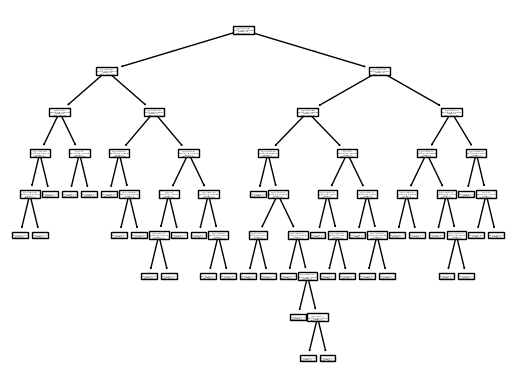

In [94]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [95]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r_score=r2_score(y_pred,y_test)
r_score

0.9452654881898179

In [96]:
import pickle
file_name='finalized_model_DecisionTree.sav'
pickle.dump(regressor,open(file_name,'wb'))